# Statistical Analysis of Bachelor Data

##Import Dependencies

In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import requests
import json
import math

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# import helper commands
from helpers import *


## Import Data

In [3]:
#Import all data sources

#Data for each contestant broken down by seasons
with open('tempdata/seasonsDict.json') as json_file:
    seasonsDict = json.load(json_file)

#Twitter
with open("twitter_sentiment.json") as json_file:
    twitter = json.load(json_file)
    
#Distances
with open("distances.json") as json_file:
    distances = json.load(json_file)
    
#Geo-Cluster
with open("geo_cluster.json") as json_file:
    geo_cluster = json.load(json_file)
    
#Profession
with open("profession_dict.json") as json_file:
    professions = json.load(json_file)
    
#Wiki Info
wiki = pd.read_csv("contestantDF.csv")

#Date Guide
date_guide = pd.read_csv("date_guide.csv")

# PCA data 
raw_pca_data = pd.read_csv("theBachelorPCA_dict.csv",header=None)

#Competition Data
with open("competition_data.json") as json_file:
    comp = json.load(json_file)

In [146]:
twitter['13']
comp['17']
#seasonsDict['13']
if w in comp[season]:
    fname = contestant['name'].split(' ')[0]
    dates = comp[season][w]
    if fname in dates:
        print dates[fname]
#date_guide

{u'2': {u'Amanda': {u'group date:': False},
  u'Brooke': {u'group date:': False},
  u'Catherine': {u'group date:': False},
  u'Daniella': {u'group date:': False},
  u'Desiree': {u'one-on-one date:': True},
  u'Diana': {u'group date:': False},
  u'Kacie': {u'group date:': False},
  u'Katie': {u'group date:': False},
  u'Kristy': {u'group date:': False},
  u'Lesley': {u'group date:': False},
  u'Robyn': {u'group date:': False},
  u'Sarah': {u'one-on-one date:': True},
  u'Selma': {u'group date:': False},
  u'Taryn': {u'group date:': False},
  u'Tierra': {u'group date:': False}},
 u'3': {u'Amanda': {u'group:': False},
  u'AshLee': {u'one-on-one:': True},
  u'Catherine': {u'group:': False},
  u'Daniella': {u'group:': False},
  u'Desiree': {u'group:': False},
  u'Jackie': {u'group:': False},
  u'Kacie': {u'group:': False},
  u'Kristy': {u'group:': False},
  u'Lesley': {u'one-on-one:': True},
  u'Leslie': {u'group:': False},
  u'Lindsay': {u'group:': True},
  u'Robyn': {u'group:': False},
  

In [154]:
df.head()

age  avg_num_tweets  avg_tweet_sentiment     distance  elimination  geo_cluster  group_dates                hometown  individual_dates               name                              occupation  profession  roses_from_group_dates  roses_from_individual_dates  season  std_num_tweets  std_tweet_sentiment  total_tweet_sentiment  total_tweets  won
0  25       13.285714             0.179650  1025.064422           10            5            2           Dallas, Texas                 1    Melissa Rycroft                    Sales Representative           5                       0                            1      13       15.562907             0.364435               1.257547            93    1
1  24       10.285714             0.071815   226.889927            9            4            1  Grand Rapids, Michigan                 1      Molly Malaney                  Department Store Buyer           3                       1                            1      13       11.106167             0.301890               0.502707            72    0
2  29        5.333333            -0.073958  1879.977325            7            7            2    Peace River, Alberta                 1     Jillian Harris                       Interior Designer           2                       0                            0      13        7.086764             0.096178              -0.443750            32    0
3  24        1.200000             0.005556  2026.201031            6            6            3    Carlsbad, California                 0  Naomi Rose Crespo                        Flight Attendant           5                       1                            0      13        2.400000             0.011111               0.027778             6    0
4  34        4.000000             0.062500   538.679446            5            3            0     Huntsville, Alabama                 2    Stephanie Hogan  Single Mother & Medical Marketing Rep.           3                       0                            2      13        1.414214             0.180422               0.250000            16    0

## Aggregate Data to be Used in DF

In [38]:
# Organize all the data into a single list
contestants = []
for sn in seasonsDict:
    if int(sn) > 12: # only add data from seasons 13 and on
        for contestant in seasonsDict[sn]:
            cname = contestant['name']
            # add twitter data to contestants info
            foundTwitterName = False
            for tname in twitter[sn]:
                if tname in cname:
                    if len(twitter[sn][tname]) > 0:
                        ntweets = []
                        tweetSentiment = []
                        for date in twitter[sn][tname]:
                            ntweets.append(twitter[sn][tname][date]['ntweet'])
                            tweetSentiment.append(twitter[sn][tname][date]['sentiment'])
                        contestant['avg_num_tweets'] = np.mean(ntweets)
                        contestant['std_num_tweets'] = np.std(ntweets)
                        contestant['total_tweets'] = np.sum(ntweets)
                        contestant['avg_tweet_sentiment'] = np.mean(tweetSentiment)
                        contestant['std_tweet_sentiment'] = np.std(tweetSentiment)
                        contestant['total_tweet_sentiment'] = np.sum(tweetSentiment)
                    else:
                        contestant['avg_num_tweets'] = 0
                        contestant['std_num_tweets'] = 0
                        contestant['total_tweets'] =0
                        contestant['avg_tweet_sentiment'] = 0
                        contestant['std_tweet_sentiment'] = 0
                        contestant['total_tweet_sentiment'] = 0
            
            if cname in distances[sn]:
                # add distance data 
                contestant['distance'] = distances[sn][cname]

                # add profession data

                contestant['profession'] = professions[sn][cname]

                # add geo cluster data 
                contestant['geo_cluster'] = geo_cluster[sn][cname]
                
                contestants.append(contestant)


## Generate DF for All Data

In [75]:
# Create data frame from the contestants dictionary
df = pd.DataFrame(contestants)
# get rid of an samples that contain NaN
df = df.dropna()
# just in case, we drop any duplicate samples 
df = df.drop_duplicates()
# get rid of the samples for bachelors
df = df[df.elimination != 'unknown']
# create a column for 'won' to indicate whether the contestant won or did not 
df['won'] = (df.elimination == 'Winner')*1
# winners and runners up are currently strings. We need to turn them into integers
df['elimination'] = df['elimination'].apply(change_winner_runnerup)
df['elimination'] = df['elimination'].astype('int')
# create a dataframe where the unecessary columns are droped
df_temp = df.drop(['hometown','name','occupation','season','std_num_tweets','std_tweet_sentiment'],1)
df_temp.head()

age  avg_num_tweets  avg_tweet_sentiment     distance  elimination  geo_cluster  group_dates  individual_dates  profession  roses_from_group_dates  roses_from_individual_dates  total_tweet_sentiment  total_tweets  won
0  25       13.285714             0.179650  1025.064422           10            5            2                 1           5                       0                            1               1.257547            93    1
1  24       10.285714             0.071815   226.889927            9            4            1                 1           3                       1                            1               0.502707            72    0
2  29        5.333333            -0.073958  1879.977325            7            7            2                 1           2                       0                            0              -0.443750            32    0
3  24        1.200000             0.005556  2026.201031            6            6            3                 0           5                       1                            0               0.027778             6    0
4  34        4.000000             0.062500   538.679446            5            3            0                 2           3                       0                            2               0.250000            16    0

#### Get the shape of data 

In [76]:
df_temp.shape

(187, 14)

#### Get the summary statistics for each of the columns

In [77]:
df_temp.describe()

avg_num_tweets  avg_tweet_sentiment     distance  elimination  geo_cluster  group_dates  individual_dates  profession  roses_from_group_dates  roses_from_individual_dates  total_tweet_sentiment  total_tweets         won
count      187.000000           187.000000   187.000000   187.000000   187.000000   187.000000        187.000000  187.000000              187.000000                   187.000000             187.000000    187.000000  187.000000
mean        69.345355            -0.004858  1165.395685     3.791444     3.898396     1.454545          0.294118    8.385027                0.176471                     0.278075              -0.015337    322.203209    0.037433
std         77.579937             0.056251   783.188000     2.787131     1.921958     1.531679          0.522728   72.849465                0.458940                     0.516086               0.224103    460.825955    0.190330
min          0.000000            -0.232394    86.282895     1.000000     1.000000     0.000000          0.000000    1.000000                0.000000                     0.000000              -1.311356      0.000000    0.000000
25%          0.000000            -0.019816   660.400620     1.000000     2.000000     0.000000          0.000000    2.000000                0.000000                     0.000000              -0.068591      0.000000    0.000000
50%         21.000000             0.000000  1053.297131     3.000000     4.000000     1.000000          0.000000    3.000000                0.000000                     0.000000               0.000000     65.000000    0.000000
75%        151.482143             0.005344  1526.413253     6.000000     6.000000     3.000000          1.000000    5.000000                0.000000                     0.000000               0.024874    528.000000    0.000000
max        200.000000             0.250000  5323.980053    10.000000     7.000000     5.000000          2.000000  999.000000                3.000000                     2.000000               1.257547   1714.000000    1.000000

#### Look at any correlations between variables. 
We particularly look at the correlation between dependent variables and the elimination week for each contestant

In [78]:
df.corr()

avg_num_tweets  avg_tweet_sentiment  distance  elimination  geo_cluster  group_dates  individual_dates  profession  roses_from_group_dates  roses_from_individual_dates    season  std_num_tweets  std_tweet_sentiment  total_tweet_sentiment  total_tweets       won
avg_num_tweets                     1.000000            -0.114436 -0.069267     0.611631     0.011121     0.582557          0.471705    0.110775                0.401551                     0.478918  0.532656        0.383312             0.119489              -0.083780      0.829431  0.220814
avg_tweet_sentiment               -0.114436             1.000000 -0.070979    -0.020639     0.108006    -0.050075          0.017573   -0.026435                0.028697                     0.041667 -0.028752       -0.081392             0.106888               0.827491     -0.036726  0.007494
distance                          -0.069267            -0.070979  1.000000    -0.082435     0.179984    -0.027058          0.015559   -0.041580                0.016571                     0.008595 -0.055719       -0.054335            -0.132512              -0.036534     -0.098136 -0.043392
elimination                        0.611631            -0.020639 -0.082435     1.000000     0.012081     0.741440          0.673359    0.031272                0.524898                     0.657260  0.122546        0.523831             0.540091              -0.023664      0.803922  0.440464
geo_cluster                        0.011121             0.108006  0.179984     0.012081     1.000000     0.048646         -0.007555   -0.034585                0.136245                    -0.025565 -0.001088       -0.004855            -0.020975               0.047102      0.051317  0.010453
group_dates                        0.582557            -0.050075 -0.027058     0.741440     0.048646     1.000000          0.490192    0.123120                0.512434                     0.485371  0.226564        0.470758             0.396215              -0.056535      0.670588  0.181068
individual_dates                   0.471705             0.017573  0.015559     0.673359    -0.007555     0.490192          1.000000   -0.041251                0.409984                     0.970668  0.110028        0.370807             0.310167               0.026845      0.671976  0.267014
profession                         0.110775            -0.026435 -0.041580     0.031272    -0.034585     0.123120         -0.041251    1.000000                0.132391                    -0.039042  0.072527       -0.030258             0.037650              -0.028649      0.066843 -0.015004
roses_from_group_dates             0.401551             0.028697  0.016571     0.524898     0.136245     0.512434          0.409984    0.132391                1.000000                     0.427277  0.151072        0.062495             0.142837               0.056420      0.604444  0.170166
roses_from_individual_dates        0.478918             0.041667  0.008595     0.657260    -0.025565     0.485371          0.970668   -0.039042                0.427277                     1.000000  0.112444        0.351790             0.299864               0.061416      0.680729  0.276597
season                             0.532656            -0.028752 -0.055719     0.122546    -0.001088     0.226564          0.110028    0.072527                0.151072                     0.112444  1.000000        0.204898            -0.158441               0.016951      0.391095 -0.006322
std_num_tweets                     0.383312            -0.081392 -0.054335     0.523831    -0.004855     0.470758          0.370807   -0.030258                0.062495                     0.351790  0.204898        1.000000             0.225901              -0.144384      0.395057  0.052510
std_tweet_sentiment                0.119489             0.106888 -0.132512     0.540091    -0.020975     0.396215          0.310167    0.037650                0.142837                     0.299864 -0.158441        0.225901             1.000000   

We look primarily at those variables that are correlated with winning the entire competition and those correleated with a higher elimination week.

Those variables with a higher positive correlation with winning the entire competition where average number of tweets, the number of total individual and group dates as well as the number of roses acquired from these dates.

Those variables with a higer positive correlation with higher elimination weeks were the same as those variables that correlated with winning the entire competition. The correlation between these dependent variables and the elimination week, howerver, were almost three times greater than the correlation between the same dependent variables and winning the competition.

#### Correlation between average number of tweets and elimination week

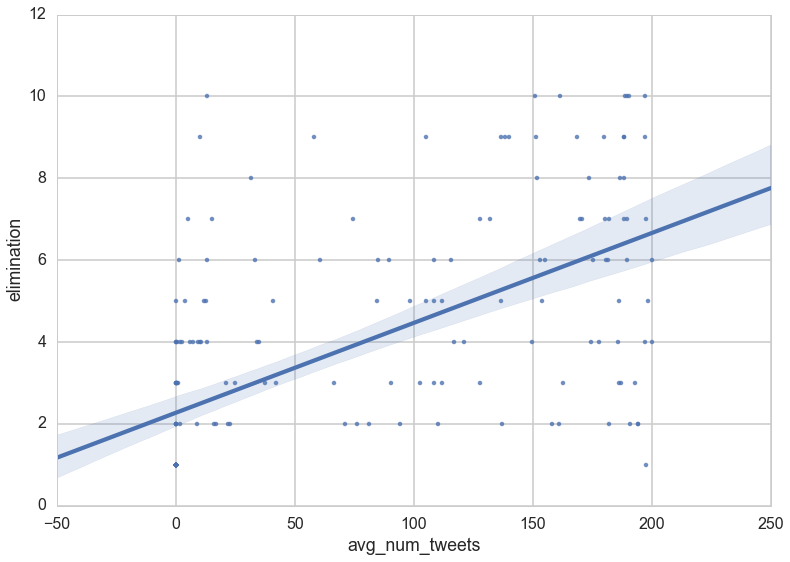

In [79]:
sns.regplot(y="elimination", x="avg_num_tweets", data=df, fit_reg = True)

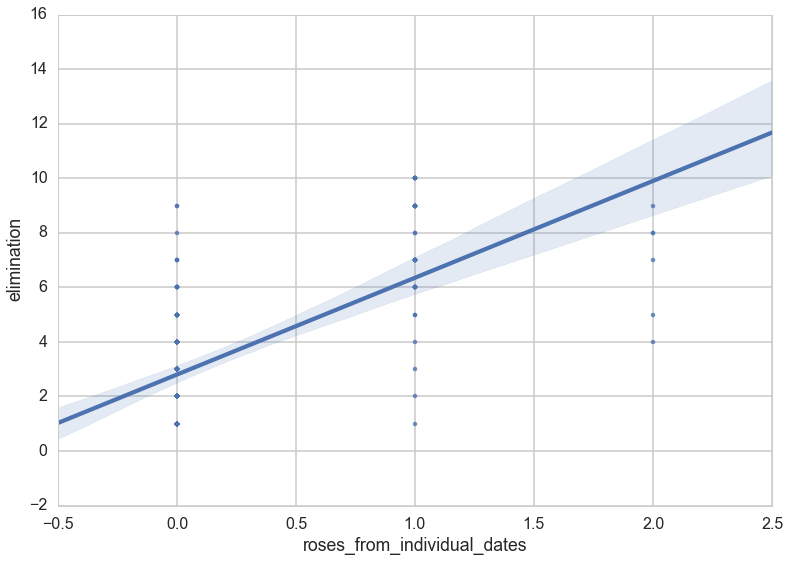

In [143]:
sns.regplot(y="elimination", x="roses_from_individual_dates", data=df, fit_reg = True)

## Looking at the Correlation between Dependent Variables
We attempt to vizualize the correlation between dependent variables that are positively correlated with the independent variables

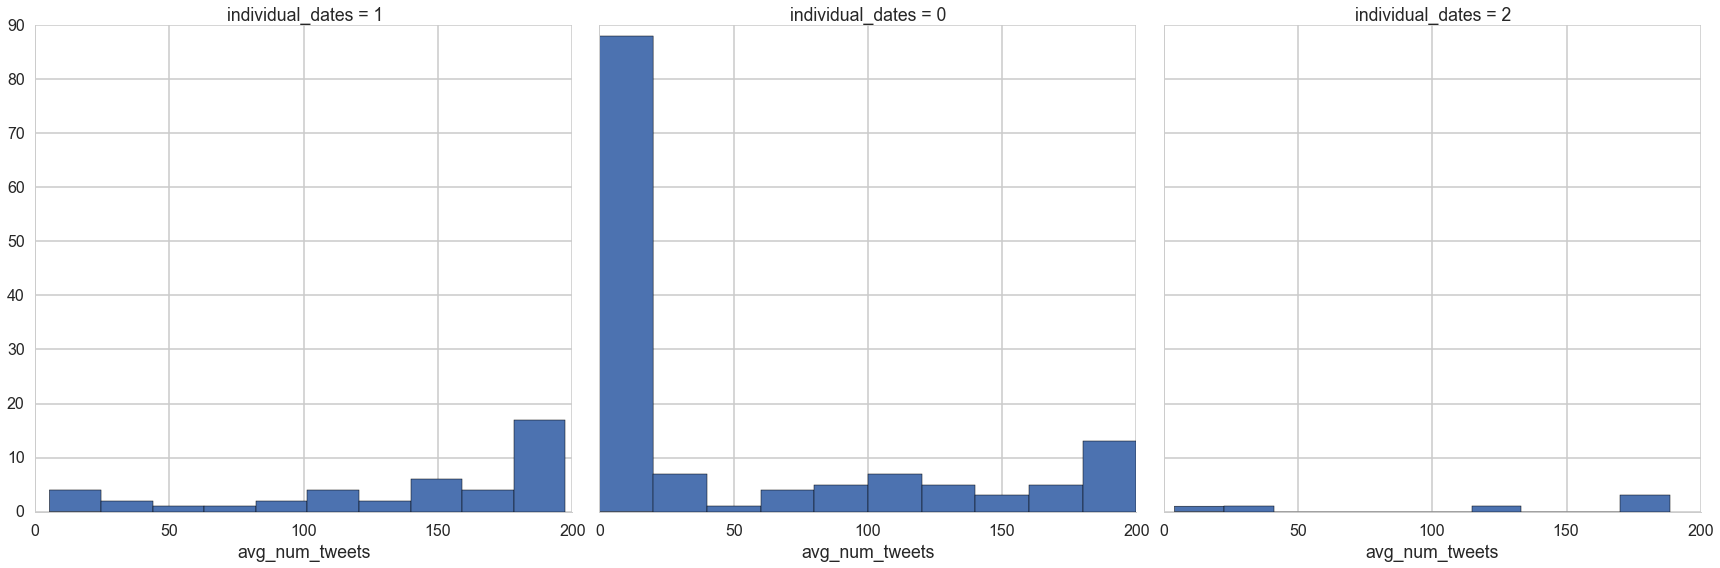

In [81]:
# Plot histogram of number of tweets broken up by individual dates
g = sns.FacetGrid(col="individual_dates", data=df, size=8)
g.map(plt.hist, "avg_num_tweets")

There is a higher distribution of tweets for those individuals that received individual dates.

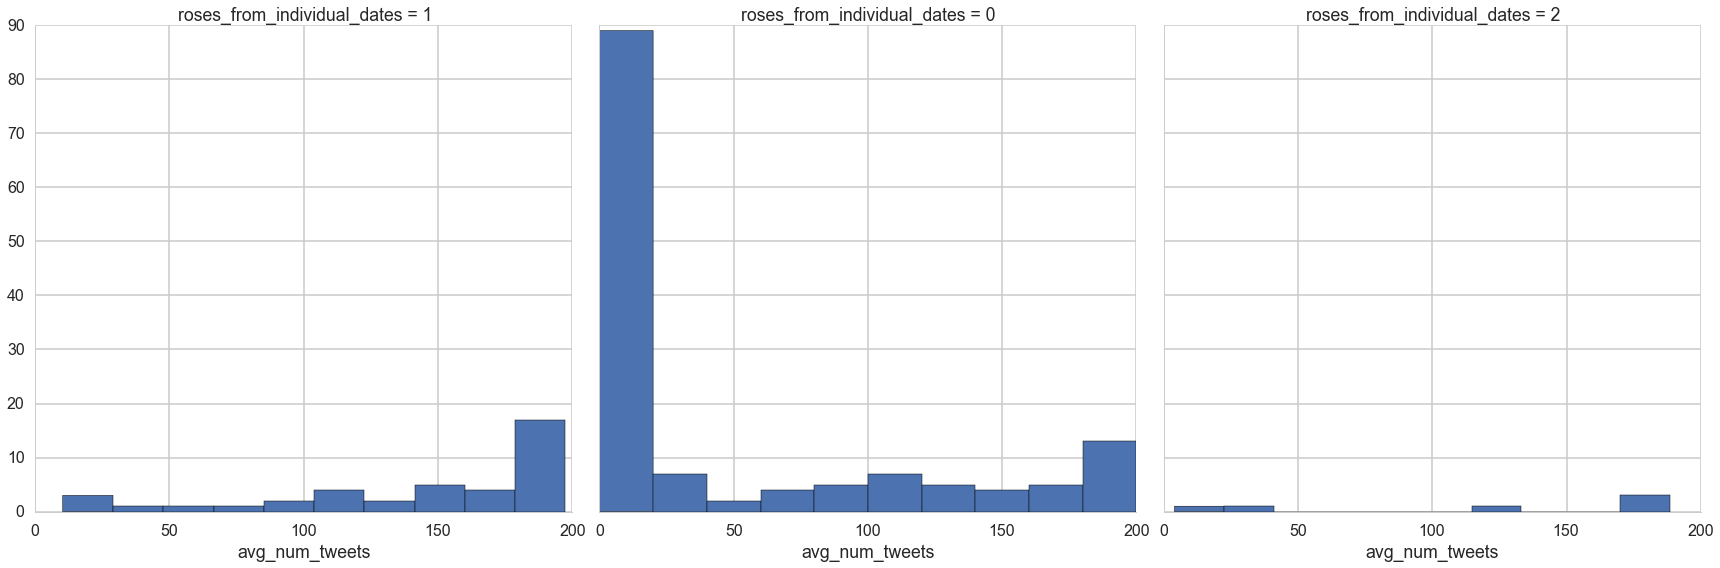

In [82]:
# Plot histogram of number of tweets broken up by individual dates
g = sns.FacetGrid(col="roses_from_individual_dates", data=df, size=8)
g.map(plt.hist, "avg_num_tweets")

Likewise, there is a higher distribution of tweets for those that candidates that received a rose from individual dates.

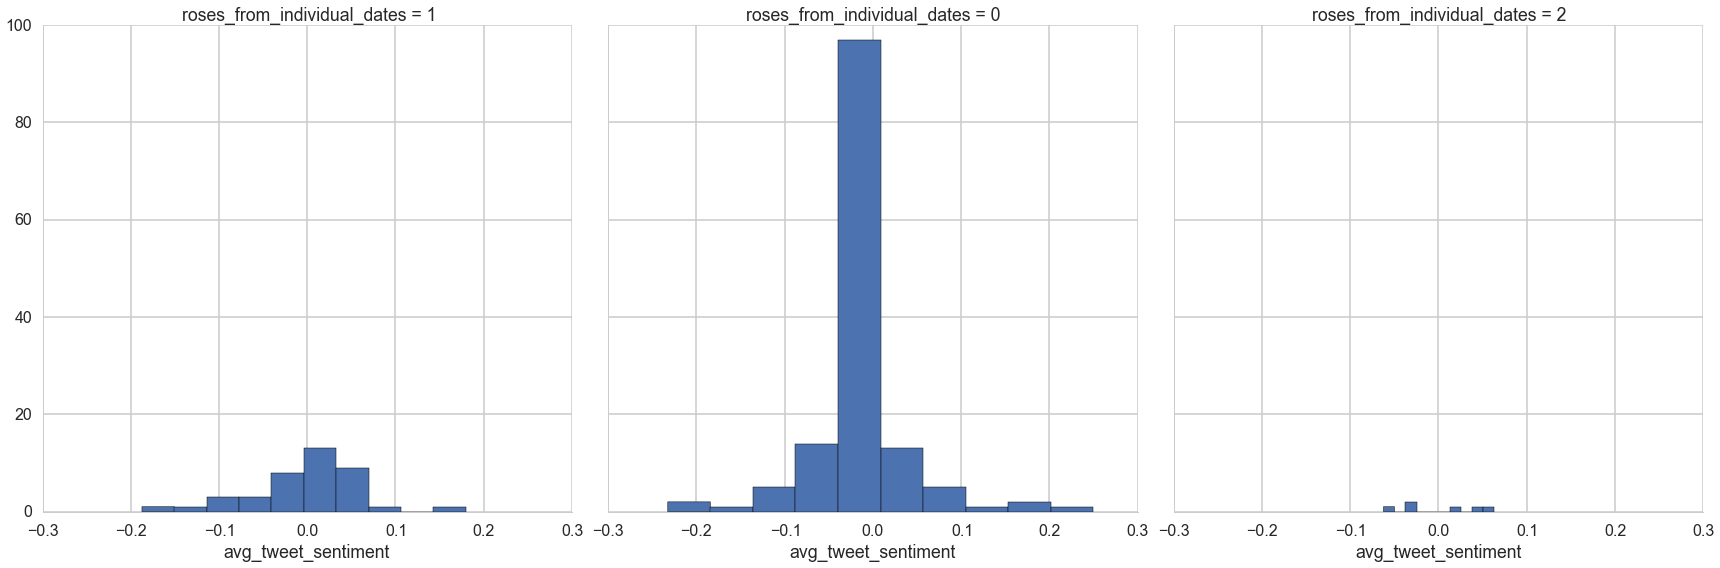

In [83]:
# Plot histogram of number of tweets broken up by 
g = sns.FacetGrid(col="roses_from_individual_dates", data=df, size=8)
g.map(plt.hist, "avg_tweet_sentiment")

We also look to see if roses from individual dates had a higher distribution of contestants that had higher avgerage twitter sentiment. Theres a relatively higher distribution of contestants who received roses from individual dates and  received had higher twitter sentiments. 

## Breakdown Data by Season
We want to breakdown the data by season to account for the differences in the number of tweets from each season, since the average number of tweets about all contestants should increase from year to year due to twitter's broader addoption. 

In [106]:
season_dfs = {}
for sn in range(13,20):
    seasons_dfs[sn] = df_temp[df['season'] == sn]

In [107]:
seasons_dfs[14].head()

age  avg_num_tweets  avg_tweet_sentiment     distance  elimination  geo_cluster  group_dates  individual_dates  profession  roses_from_group_dates  roses_from_individual_dates  total_tweet_sentiment  total_tweets  won
55  23      151.000000            -0.187337   970.915710           10            3            2                 1           1                       0                            1              -1.311356          1057    1
56  25      140.142857             0.006997  1638.689701            9            6            1                 0           2                       1                            0               0.048978           981    0
57  26       74.666667            -0.048547  1371.988917            7            1            1                 1           5                       0                            1              -0.291285           448    0
58  25      108.400000            -0.012097  1453.479117            6            1            1                 1           1                       0                            1              -0.060484           542    0
59  23       12.750000             0.014583   965.750991            5            3            2                 0           4                       0                            0               0.058333            51    0

In [108]:
seasons_dfs[14].corr()

avg_num_tweets  avg_tweet_sentiment  distance  elimination  geo_cluster  group_dates  individual_dates  profession  roses_from_group_dates  roses_from_individual_dates  total_tweet_sentiment  total_tweets       won
avg_num_tweets                     1.000000            -0.424514  0.421617     0.726037    -0.014823     0.248434          0.325700   -0.342484                0.272428                     0.325700              -0.512249      0.877604  0.454344
avg_tweet_sentiment               -0.424514             1.000000  0.045370    -0.376984     0.184719    -0.159607         -0.374793    0.179505               -0.039295                    -0.374793               0.822788     -0.400540 -0.453450
distance                           0.421617             0.045370  1.000000     0.402683     0.176988     0.351712          0.006602   -0.295860                0.327576                     0.006602               0.006672      0.410445 -0.024731
elimination                        0.726037            -0.376984  0.402683     1.000000    -0.170559     0.661066          0.501505   -0.176804                0.276867                     0.501505              -0.583122      0.881673  0.554021
geo_cluster                       -0.014823             0.184719  0.176988    -0.170559     1.000000    -0.157945         -0.465390   -0.112969                0.029788                    -0.465390               0.227593     -0.061177 -0.082479
group_dates                        0.248434            -0.159607  0.351712     0.661066    -0.157945     1.000000          0.122095   -0.263939                0.143092                     0.122095              -0.377205      0.369764  0.374192
individual_dates                   0.325700            -0.374793  0.006602     0.501505    -0.465390     0.122095          1.000000    0.144996               -0.138159                     1.000000              -0.459775      0.368889  0.302849
profession                        -0.342484             0.179505 -0.295860    -0.176804    -0.112969    -0.263939          0.144996    1.000000                0.065333                     0.144996               0.255911     -0.293745 -0.223972
roses_from_group_dates             0.272428            -0.039295  0.327576     0.276867     0.029788     0.143092         -0.138159    0.065333                1.000000                    -0.138159               0.079721      0.352925 -0.060193
roses_from_individual_dates        0.325700            -0.374793  0.006602     0.501505    -0.465390     0.122095          1.000000    0.144996               -0.138159                     1.000000              -0.459775      0.368889  0.302849
total_tweet_sentiment             -0.512249             0.822788  0.006672    -0.583122     0.227593    -0.377205         -0.459775    0.255911                0.079721                    -0.459775               1.000000     -0.603551 -0.849981
total_tweets                       0.877604            -0.400540  0.410445     0.881673    -0.061177     0.369764          0.368889   -0.293745                0.352925                     0.368889              -0.603551      1.000000  0.628029
won                                0.454344            -0.453450 -0.024731     0.554021    -0.082479     0.374192          0.302849   -0.223972               -0.060193                     0.302849              -0.849981      0.628029  1.000000

It is interesting to note that average and total tweet sentiment have high negative correlations with winning the competition (-0.400540 and -0.849981, respectively), while the average and total number of tweets maintains a high positive correlation with winning the competition (0.454344 and 0.628029, respectively).

The same phenomena are true when looking at these dependent variables and a contestant's elimination week.


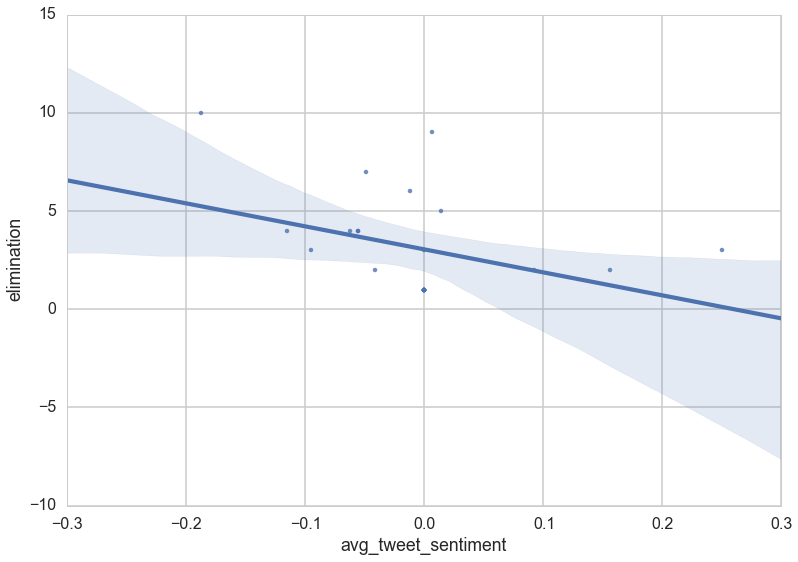

In [109]:
sns.regplot(y="elimination", x="avg_tweet_sentiment", data=seasons_dfs[14], fit_reg = True)

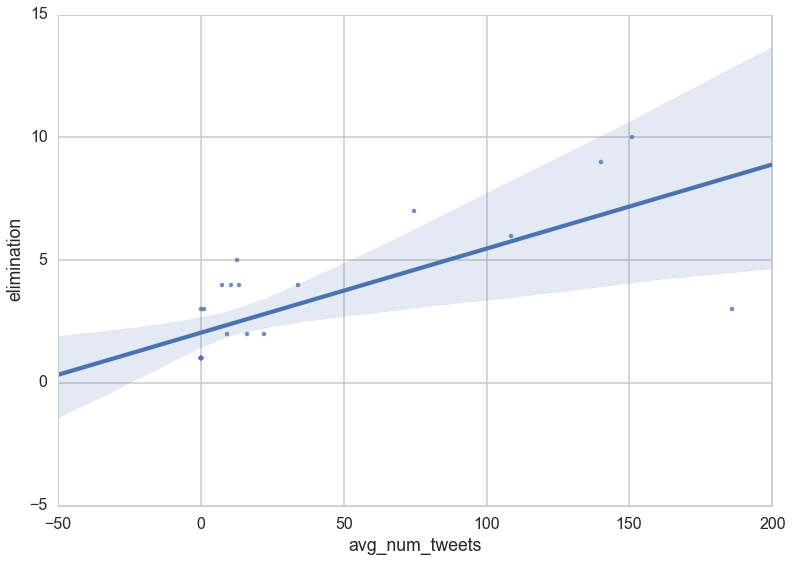

In [110]:
sns.regplot(y="elimination", x="avg_num_tweets", data=seasons_dfs[14], fit_reg = True)

## Breakdown Data by Week
We want to look at the data on a week by week basis to determine the likely hood of a given participant moving on to the next week. We also create a weekly breakdown of the data that treates each week a contestant is on the shoe as unique sample. This allows us to generate more data out of our data set. 

#### Creating DF for weekly data

In [ ]:
# Create a dict with the samples pertaining to a given week
week_dfs = {}
df_temp = df.copy()
# For each row in the df get the relavint data broken down by week 
for row in df_temp.iterrows():
    contestant = row[1] 
    season = contestant['season']
    episode_count = date_guide.groupby('Season').Episode.count()[season]
    week_dfs['all'] = []
    contestants_data = []
    # for each week get dependent variables that can change by week
    for week in range(1, episode_count):
        week_dfs[week] = []
        if week < contestant['elimination']:
            # get the number of individual dates received
            contestant['total_individual_dates'] = 0
            # get the number of group dates from received
            contestant['total_group_dates'] = 0
            # get whether contestant received individual date rose
            contestant['recieved_individual_date'] = False
            # get whether contestant received group dates
            contestant['recieved_group_dates'] = False
            # get the number of group roses received
            contestant['total_group_roses'] =  0
            # get whether contestant received group date rose
            contestant['recieved_group_rose'] = False
            # get whether contestant received individual rose in previous week
            contestant['individual_rose_last_week'] = False
            # get whether contestant received group rose in previous week
            contestant['group_rose_last_week'] = False
            # get the number of tweets about contestant overall
            contestant['total_tweets'] = 0
            # get the number of tweets from previos week
            contestant['tweets_last_week'] = 0
            # get the total tweet sentiment
            contestant['total_tweet_sentiment'] = 0
            # get the tweet sentiment from last week
            contestant['tweet_sentiment_last_week'] = 0
            
            # iterate through previous weeks to get relevant data
            for w in range(1,week):
                if str(w) in comp[str(season)]:
                    fname = contestant['name'].split(' ')[0]
                    dates = comp[str(season)][str(w)]
                
            contestants_data.append(contestant)
        print len(contestants_data)

                    #if fname in dates:
                        #print dates[fname]
            
week_dfs       

[age                                              25
avg_num_tweets                             13.28571
avg_tweet_sentiment                       0.1796495
distance                                   1025.064
elimination                                      10
geo_cluster                                       5
group_dates                                       2
hometown                              Dallas, Texas
individual_dates                                  1
name                                Melissa Rycroft
occupation                     Sales Representative
profession                                        5
roses_from_group_dates                            0
roses_from_individual_dates                       1
season                                           13
std_num_tweets                             15.56291
std_tweet_sentiment                       0.3644351
total_tweet_sentiment                             0
total_tweets                                      0
won        

## Cross-Validation on Data

In [40]:
#Make training/test masks
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.7)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

# make sure we didn't get unlucky in our mask selection
print "Percentage of contestants that won in training set:", np.mean(df.won[mask])
print "Percentage of contestants that won in test set:", np.mean(df.won[~mask])

Percentage of contestants that won in training set: 0.0384615384615
Percentage of contestants that won in test set: 0.0350877192982


### Run Logistic Regression on Data

In [41]:
#Find the best logistic classifier - report accuracy
CC = {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
pred_col = list(df_temp.drop('won',1).columns.values)
clf, Xtrain, ytrain, Xtest, ytest = do_classify(LogisticRegression(penalty="l1"), \
                                                   CC, df_temp, pred_col, \
                                                   'won',1, mask=mask, n_folds=3)

using mask
BEST {'C': 0.001} 0.961538461538 [mean: 0.96154, std: 0.01020, params: {'C': 0.001}, mean: 0.96154, std: 0.01020, params: {'C': 0.01}, mean: 0.96154, std: 0.01020, params: {'C': 0.1}, mean: 0.96154, std: 0.01020, params: {'C': 1.0}, mean: 0.92308, std: 0.02758, params: {'C': 10.0}, mean: 0.89231, std: 0.05282, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.96
Accuracy on test data:     0.96
[[55  0]
 [ 2  0]]
########################################################


### Decision Tree Classification

In [47]:
Xnames = list(df_temp.drop('won', 1).columns.values)

from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       df_temp, Xnames, 'won', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask
BEST {'n_estimators': 1} 0.2 [mean: 0.20000, std: 0.40000, params: {'n_estimators': 1}, mean: 0.20000, std: 0.40000, params: {'n_estimators': 2}, mean: 0.20000, std: 0.40000, params: {'n_estimators': 3}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 4}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 5}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 6}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 7}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 8}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 9}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 10}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 11}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 12}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 13}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 14}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 15}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 16}, mean: 0.00000, std: 0.00

/Users/hopemason/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hopemason/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hopemason/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hopemason/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


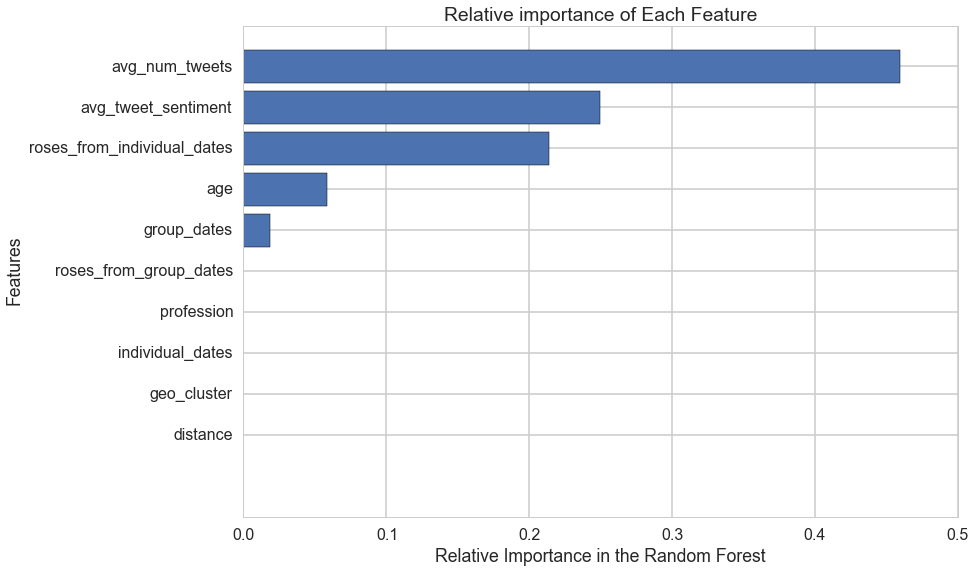

In [45]:
importance_list = clfForest.feature_importances_
name_list = Xnames
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [20]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clfTree1, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree1, parameters, df_temp, 
                                                     ['avg_tweet_sentiment', 'group_dates'],'won', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 1, 'min_samples_leaf': 1} 0.0 [mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 1}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 2}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 3}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 4}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 5}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 6}, mean: 0.00000, std: 0.00000, params: {'max_depth': 2, 'min_samples_leaf': 1}, mean: 0.00000, std: 0.00000, params: {'max_depth': 2, 'min_samples_leaf': 2}, mean: 0.00000, std: 0.00000, params: {'max_depth': 2, 'min_samples_leaf': 3}, mean: 0.00000, std: 0.00000, params: {'max_depth': 2, 'min_samples_leaf': 4}, mean: 0.00000, std: 0.00000, params: {'max_depth': 2, 'min_samples_leaf': 5}, mean: 0.00000, std: 0.00000, params: {'max_depth': 2, 'min_samples_leaf': 6}, mea

/Users/hopemason/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hopemason/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hopemason/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hopemason/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hopemason/anaconda/lib/python2.7/site-package

In [21]:
#plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, lab = ['Average Number of Tweets', 'Number of Roses from Group Dates'], alpha = 1, plot_train = False)

In [38]:
imp_cols = clfForest.feature_importances_.argsort()[::-1][0:2]
imp_cols
X_imp = df[imp_cols].values
Y = df.won.values
imp_cols
#Xnames

array([1, 2])

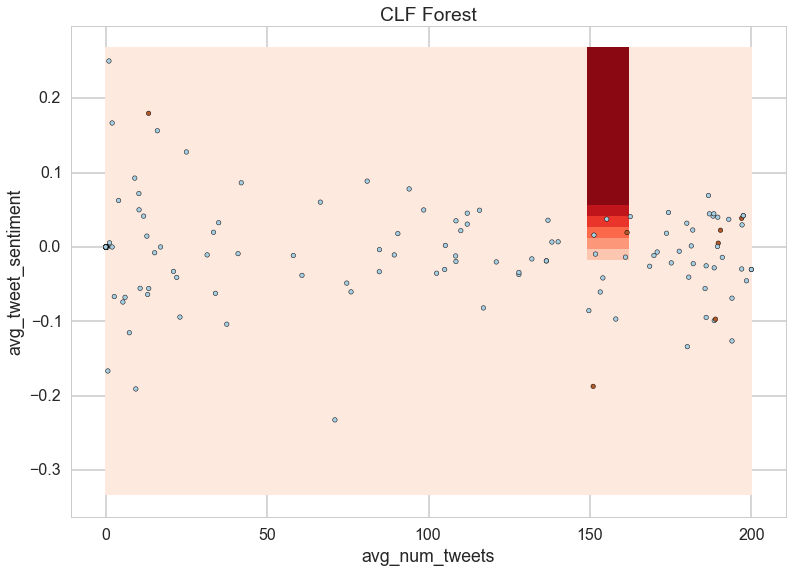

In [39]:
plt.title('CLF Forest')
plt.xlabel(Xnames[imp_cols[0]])
plt.ylabel(Xnames[imp_cols[1]])
plot_decision_surface(clfForest, X_imp, Y)

In [1]:
tweet_df = df[['avg_num_tweets','std_num_tweets','avg_tweet_sentiment','std_tweet_sentiment','elimination']]
def change_winner_runnerup(v):
    if v == "Winner":
        return 10
    elif v == "Runner-up":
        return 9
    elif 'week' in v.lower():
        for num in range(0,10):
            if str(num) in v:
                return num
    else:
        return v
tweet_df['elimination'] = tweet_df['elimination'].apply(change_winner_runnerup)
tweet_df['elimination'] = tweet_df['elimination'].astype('int')
tweet_df.head()

NameError: name 'df' is not defined